In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [4]:
true =pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')


In [5]:
fake.head(1)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


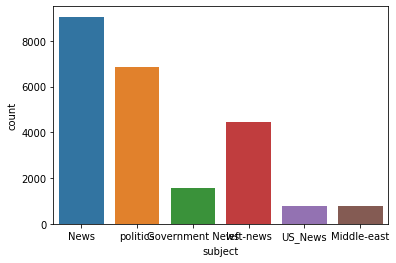

In [8]:
sns.countplot('subject',data=fake) #easy way to visualize the content "feature subject " of the data fake


#WordCloud

In [9]:
text=' '.join(fake['text'].tolist())

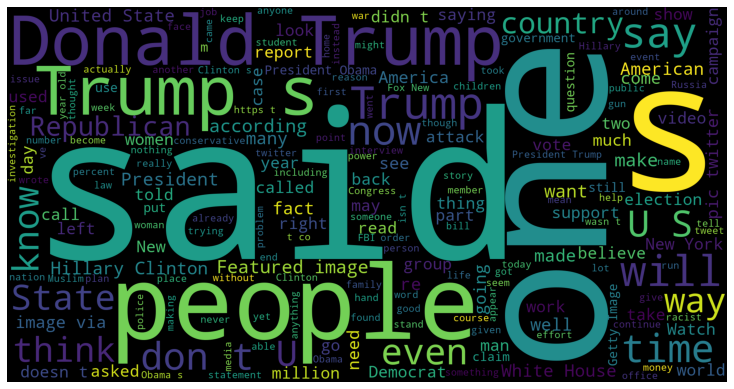

In [10]:
wordcloud=WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [11]:
text2 = ' '.join(true['text'].tolist())

In [12]:
unkown_publishers = []
for index, row in enumerate(true.text.values):
  try:

    record = row.split(' - ',maxsplit=1)
    assert(len(record[0])<260)
  except:
    unkown_publishers.append(index)

In [13]:
len(unkown_publishers)

31

In [14]:
true.iloc[unkown_publishers].text

2922     The following statements were posted to the ve...
3488     The White House on Wednesday disclosed a group...
3782     The following statements were posted to the ve...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5290     The following statements were posted to the ve...
5379     The following statements were posted to the ve...
5412     The following statements were posted to the ve...
5504     The following statements were posted to the ve...
5538     The following statements were posted to the ve...
5588     The following statements were posted to the ve...
5593     The following statements were posted to the ve...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s.

In [15]:
true=true.drop(8970, axis=0)

In [16]:
publisher=[]
tmp_text =[]
for index, row in enumerate(true.text.values):
  if index in unkown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [17]:
true['publisher']=publisher
true['text']=tmp_text

In [18]:
true.head(2)

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)


In [19]:
empty_fake=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [20]:
fake.iloc[empty_fake]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [21]:
true['text']=true['title']+" "+true['text']

In [22]:
fake['text']=fake['title']+" "+fake['text']

In [23]:
true['text']=true['text'].apply(lambda x:str(x).lower())

In [24]:
fake['text']=fake['text'].apply(lambda x:str(x).lower())

#Preprocessing Text

In [74]:
true['class'] =1 #true
fake['class']=0 #fake

In [26]:
true = true[['text', 'class']]
fake= fake[['text','class']]

In [27]:
data = true.append(fake, ignore_index=True)

In [28]:
data.sample(5)

,text,class
17763,chemical weapons watchdog to get new leader as...,1
12247,trump speaks by phone to russia's putin: white...,1
22496,disgusting trump super-pac uses obama’s voice...,0
9489,u.s. extends overtime pay to 4.2 million salar...,1
40101,fbi director confirms hillary’s worst nightmar...,0


In [29]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 5.4 MB/s 
     |████████████████████████████████| 3.7 MB 55.1 MB/s 
     |████████████████████████████████| 184 kB 66.5 MB/s 
     |████████████████████████████████| 2.2 MB 42.2 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: sp

In [30]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-pgq2jmj4
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-pgq2jmj4
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=25e94e4f25e59f0fa2a60524398328b9a1f114db3ff9872ac03a9aa6fcba7f28
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdtjs_6d/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [31]:
import preprocess_kgptalkie as ps

In [32]:
ps.remove_special_chars('this ,@ # is great&')

'this is great'

In [33]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [34]:
import gensim
y=data['class'].values

In [35]:
X=[d.split() for d in data['text'].tolist()]

In [36]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [37]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=5,min_count=1)

In [38]:
len(w2v_model.wv.vocab)

231850

In [39]:
w2v_model.wv['love']

array([ 1.0997453 , -0.37942028,  1.7317755 ,  0.6232256 , -0.8631656 ,
       -1.3423427 , -0.17960405, -3.7520142 , -1.0853055 , -1.6185666 ,
       -2.7405312 , -1.1152945 , -0.176468  , -0.783987  ,  0.8182804 ,
        0.531972  , -0.7375103 ,  0.08688749,  1.8167675 ,  0.02447015,
       -2.4648561 ,  2.1220307 , -2.0591135 , -4.064605  ,  1.7290021 ,
        0.41925818,  0.95811397,  0.4713745 , -0.31668964,  0.39230815,
        2.5132148 ,  1.4361813 , -1.0138117 , -0.2768183 ,  0.14120264,
        2.7185616 , -0.89663696, -0.5129412 , -1.6577164 , -0.12165665,
        0.06263673, -0.7044325 , -0.08826622, -0.6743159 , -1.253761  ,
       -0.64620847, -1.1705765 , -0.55148274,  0.7593233 ,  1.2015549 ,
       -0.25875   ,  1.6050719 , -2.669437  , -1.2783273 , -1.3587141 ,
        0.45188367, -0.59195673, -0.16618942, -1.4890378 ,  1.8187476 ,
       -3.3616269 , -1.5927604 ,  0.90820223, -0.17241251, -4.218157  ,
       -3.348958  ,  2.563917  , -0.77820426,  0.62040806,  1.01

In [40]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7611252665519714),
 ('malaysia', 0.7342205047607422),
 ('china', 0.7095584273338318),
 ('australia', 0.6968055367469788),
 ('tunisia', 0.6960484385490417),
 ('norway', 0.6867456436157227),
 ('thailand', 0.6795707941055298),
 ('egypt', 0.6735937595367432),
 ('japan', 0.6671739816665649),
 ('canada', 0.6646056175231934)]

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X= tokenizer.texts_to_sequences(X)

In [42]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

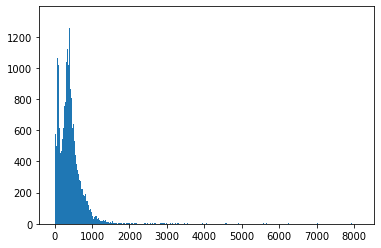

In [43]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [44]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1579

In [45]:
maxlen = 700
X = pad_sequences(X, maxlen=maxlen)

In [46]:
vocab_size = len(tokenizer.word_index)+1

In [58]:
def get_weight(model):
  weight_matrix=np.zeros((vocab_size, DIM))
  for word, i in tokenizer.word_index.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix

In [59]:
embedding_vectors=get_weight(w2v_model)

In [60]:
embedding_vectors.shape

(231851, 100)

In [61]:
model= Sequential()

In [63]:
model.add(Embedding(vocab_size, output_dim=DIM,weights=[embedding_vectors], input_length=maxlen, trainable=False))

In [64]:
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          23185100  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,302,477
Trainable params: 117,377
Non-trainable params: 23,185,100
_________________________________________________________________


In [66]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

In [67]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 41s 42ms/step - loss: 0.1623 - acc: 0.9356 - val_loss: 0.0779 - val_acc: 0.9732
Epoch 2/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0636 - acc: 0.9785 - val_loss: 0.0556 - val_acc: 0.9832
Epoch 3/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0277 - val_acc: 0.9912
Epoch 4/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0220 - acc: 0.9924 - val_loss: 0.0405 - val_acc: 0.9865
Epoch 5/6
737/737 [==============================] - 30s 41ms/step - loss: 0.0193 - acc: 0.9931 - val_loss: 0.0233 - val_acc: 0.9924
Epoch 6/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0545 - val_acc: 0.9859


In [68]:
y_pred=(model.predict(X_test)>0.5).astype(int)

In [69]:
accuracy_score(y_test, y_pred)

0.986815144766147

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5878
           1       0.97      1.00      0.99      5347

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [72]:
x=['''TUNIS, 31 juillet (Xinhua) -- Les Algériens qui quittent le territoire tunisien ne seront pas obligés de présenter, aux points de passage frontaliers, un test PCR pour détecter la COVID-19, a-t-on appris dimanche soir auprès de la présidence de la République tunisienne.

D'après la même source, "le président de la République Kaïs Saïed a décidé de dispenser les Algériens quittant le territoire tunisien des test PCR pour détecter le nouveau coronavirus".

Cette mesure entre en vigueur à partir de ce dimanche. La décision a été prise en coordination entre les deux ministères de l'Intérieur, tunisien et algérien.

Pour rappel, les frontières terrestres entre la Tunisie et l'Algérie, fermées depuis environ deux ans, ont été réouvertes à partir du 15 juillet écoulé, sur décision conjointe des deux chefs d'Etat tunisien et algérien, Kaïs Saïed et Abdelmadjid Tebboune. Fin''']

In [73]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x)>=0.5).astype(int)

array([[1]])